In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
try:
    df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
    print(df.describe(include='all'))
    print("_First five rows of the dataset_")
    print(df.head())
    print("_Null Values_")
    print(df.isnull().sum())
except:
    print("File Not found")

       customer name                                    customer e-mail  \
count            500                                                500   
unique           498                                                500   
top             Seth  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
freq               2                                                  1   
mean             NaN                                                NaN   
std              NaN                                                NaN   
min              NaN                                                NaN   
25%              NaN                                                NaN   
50%              NaN                                                NaN   
75%              NaN                                                NaN   
max              NaN                                                NaN   

       country      gender         age  annual Salary  credit card debt  \
count      500  500.0000

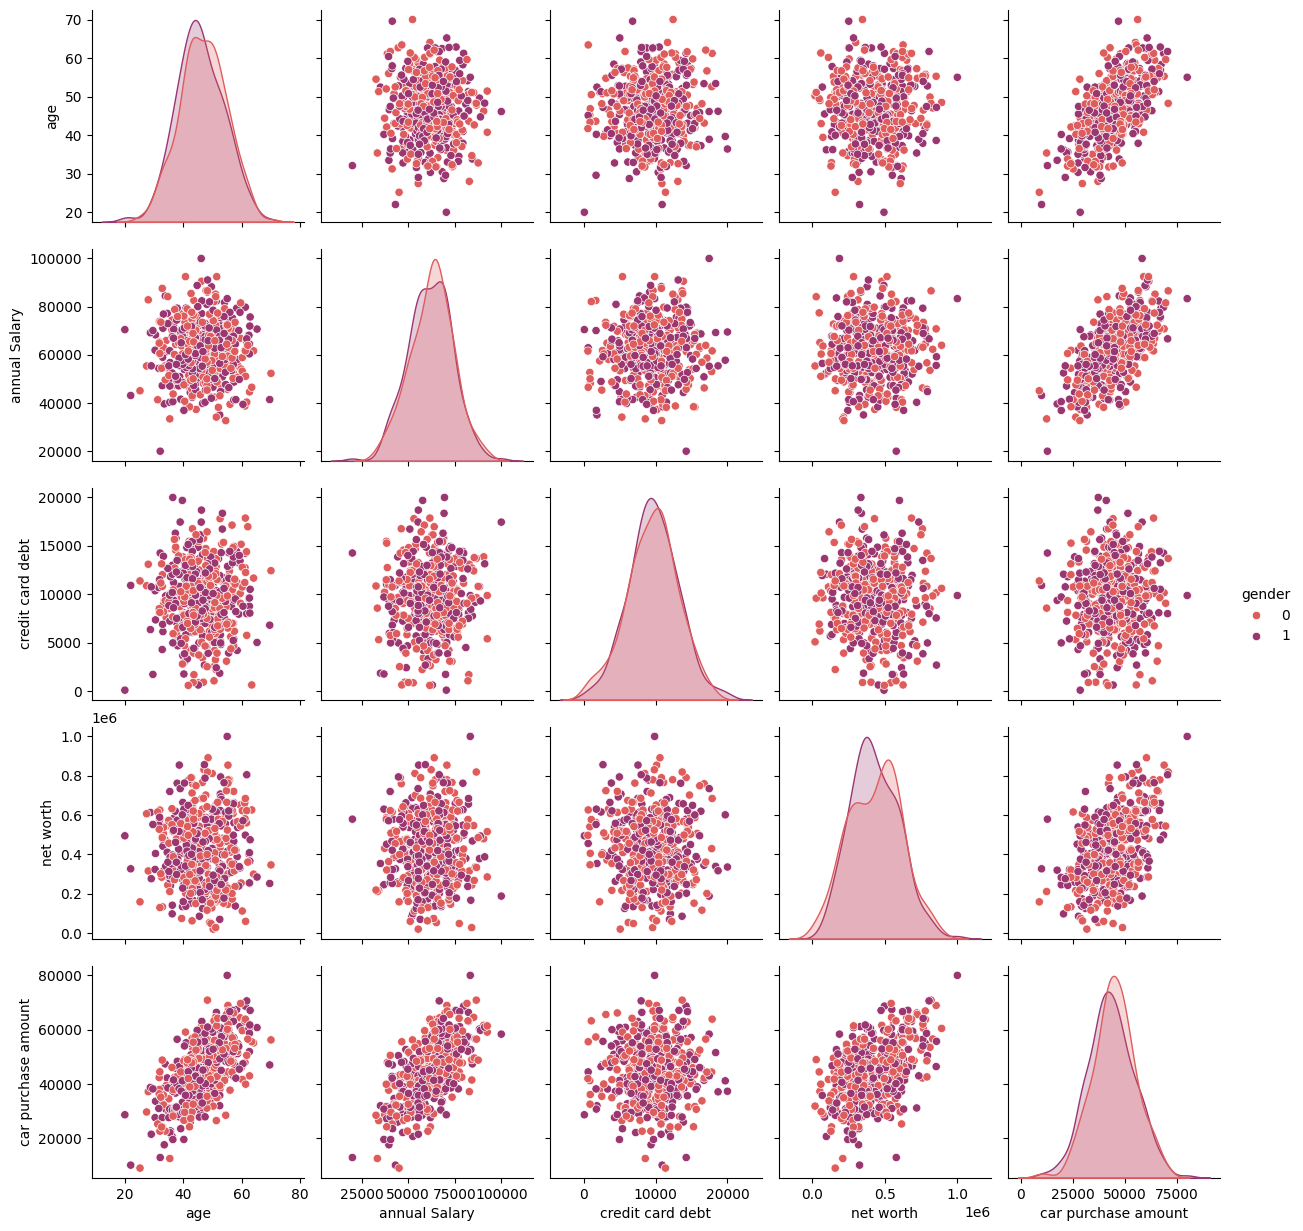

In [4]:
sb.pairplot(df,hue='gender',palette='flare')

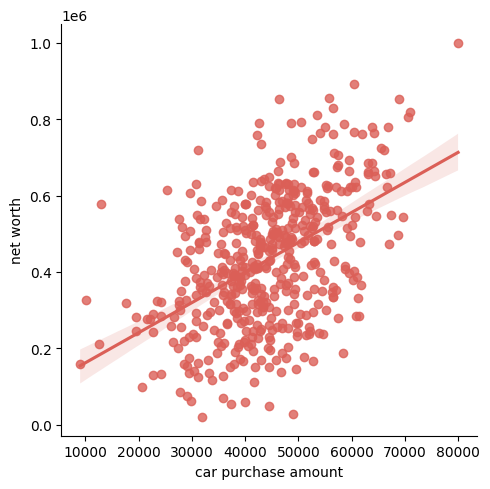

In [5]:
sb.set_palette('hls')
sb.lmplot(x='car purchase amount',y='net worth',data=df)

Text(0.5, 1.0, 'Purchase Amount vs Age hue gender')

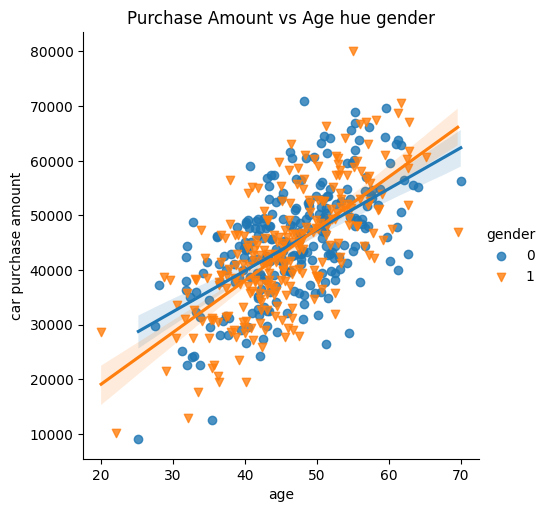

In [6]:
sb.lmplot(x='age',y='car purchase amount',data=df,hue='gender',markers=['o','v'],palette='tab10')
plt.title('Purchase Amount vs Age hue gender')

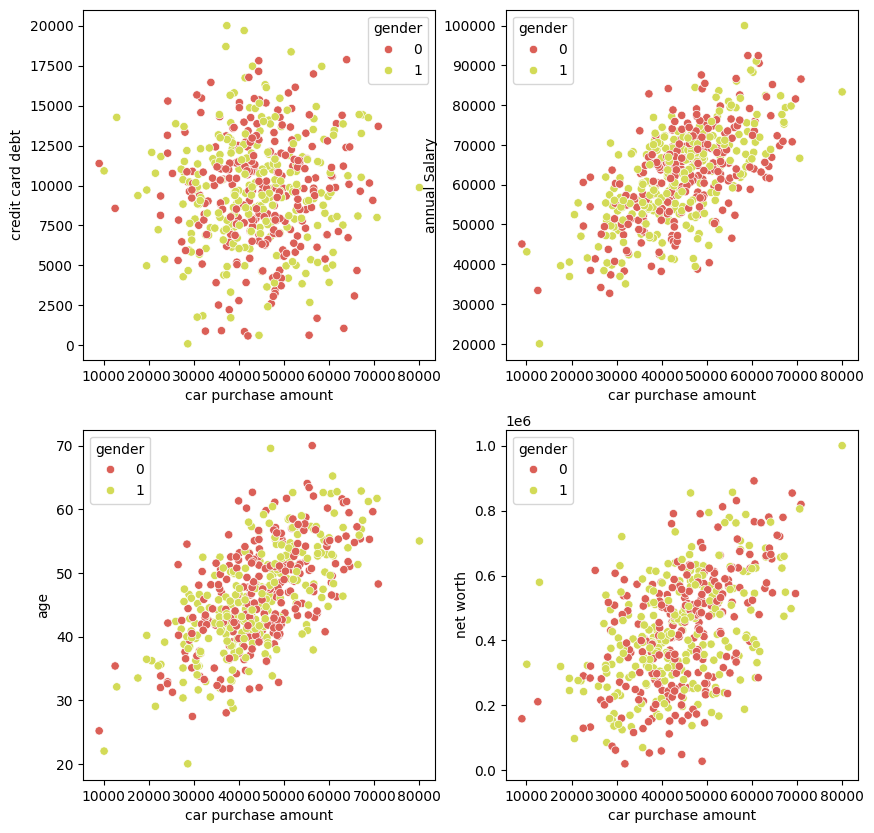

In [7]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sb.scatterplot(x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender')

In [8]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
training = model.fit(X_train, y_train, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
10/10 [==============================] - 1s 25ms/step - loss: 0.1161 - mean_absolute_error: 0.3124 - val_loss: 0.1020 - val_mean_absolute_error: 0.2842
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0763 - mean_absolute_error: 0.2436 - val_loss: 0.0636 - val_mean_absolute_error: 0.2116
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.1776 - val_loss: 0.0360 - val_mean_absolute_error: 0.1518
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0244 - mean_absolute_error: 0.1243 - val_loss: 0.0217 - val_mean_absolute_error: 0.1141
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.1029 - val_loss: 0.0176 - val_mean_absolute_error: 0.1068
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.1002 - val_loss: 0.0170 - val_mean_absolute_error: 0.1071
Epoch 7/50
10/10 [=========

In [12]:
y_pred = model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Accuracy : ", accuracy * 100, "%" )

4/4 [==============================] - 0s 4ms/step
Accuracy :  95.97305614626038 %
